In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
matplotlib.style.use('ggplot')
from datetime import timedelta
import os
import glob


In [3]:

def load(fname):
    with open(fname, "r") as f:
        result = pd.read_csv(f)
        result = result.convert_objects(convert_numeric=True)
    return result


def plot(arr, axis, title, window=5):
    smoothed = arr.rolling(window=window, min_periods=1).mean()
    smoothed.plot(ax=axis, title=title)

/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """
/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/pandas/core/series.py:2294: RuntimeWarning: Mean of empty slice
  mapped = lib.map_infer(values, f, convert=convert_dtype)
/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:13: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,center=False,window=5).mean()
  del sys.path[0]


1296
10
1920
2248
2394
2418


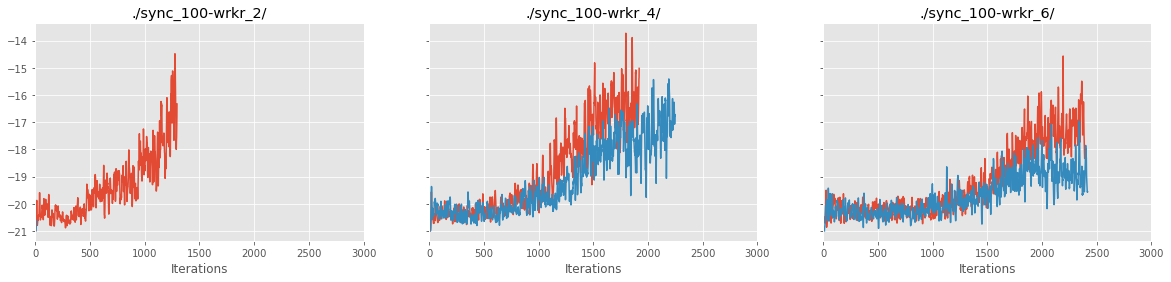

In [180]:

fig, axes = plt.subplots(1, 3, sharey=True)
fig.set_figwidth(20)

fdirs = ["./sync_100-wrkr_2/",
          "./sync_100-wrkr_4/", 
          "./sync_100-wrkr_6/"]
for fdir, ax in zip(fdirs, axes):
    for fname in glob.glob(os.path.join(fdir, "*.csv")):
        result = load(fname)
        x = result['results']
        performance = x.apply(json.loads).apply(np.nanmean)
        performance = pd.rolling_mean(pd.Series(performance), window=5, min_periods=1)
        print(len(performance))
        plot(performance, ax, fdir)
        ax.set_xlim([0, 3000])
        ax.set_xlabel("Iterations")


## Key takeaway from above:

In every setting, more models -> more iterations are needed to learn.

## Measuring the effect of varying sync times

In [195]:
def plot_timing(directory, ax, window=5):
    print(directory, "Timing")
    for fname in glob.glob(os.path.join(directory, "*.json")):
        with open(fname) as f:
            tim = json.load(f)
        vals = [np.nanmean(x, axis=0)[0] for x in (tim['stats'])]
        vals = pd.rolling_mean(pd.Series(vals), window=window, min_periods=1)
        ax.plot(tim['TS'], vals)
        ax.title.set_text(directory)
        print(str(timedelta(seconds=max(tim['TS']))))
        ax.set_ylim([-21, -10])
        ax.set_xlim([0, 1300])
        ax.set_xticks(range(0, 1300, 100))
        ax.set_xlabel("Seconds")

def plot_singletiming(fdir, ax):
    for path in glob.glob(fdir + "*.csv"):
        df = pd.read_csv(path)[:-1]
        df = df.convert_objects(convert_numeric=True)
        ax.plot(df['Current'], df['Results'])
        ax.title.set_text(fdir)
        ax.set_ylim([-21, -10])
        ax.set_xlim([0, 1300])

./e2w8_lr0.0001_sync100adam/ Timing
0:17:10.296031
0:15:27.341267


/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,center=False,window=20).mean()
  import sys


0:17:14.969965
0:14:24.395309
0:00:13.298416
./e2w8_lr0.0001_sync200adam/ Timing
0:15:49.718864
0:18:56.439319
0:16:58.771441
0:15:00.004750
./e2w8_lr0.0001_sync500adam/ Timing
0:15:36.234805
0:19:49.741226
0:18:39.971087
0:16:59.454259


/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,center=False,window=10).mean()
  import sys
/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,center=False,window=1).mean()
  import sys
/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


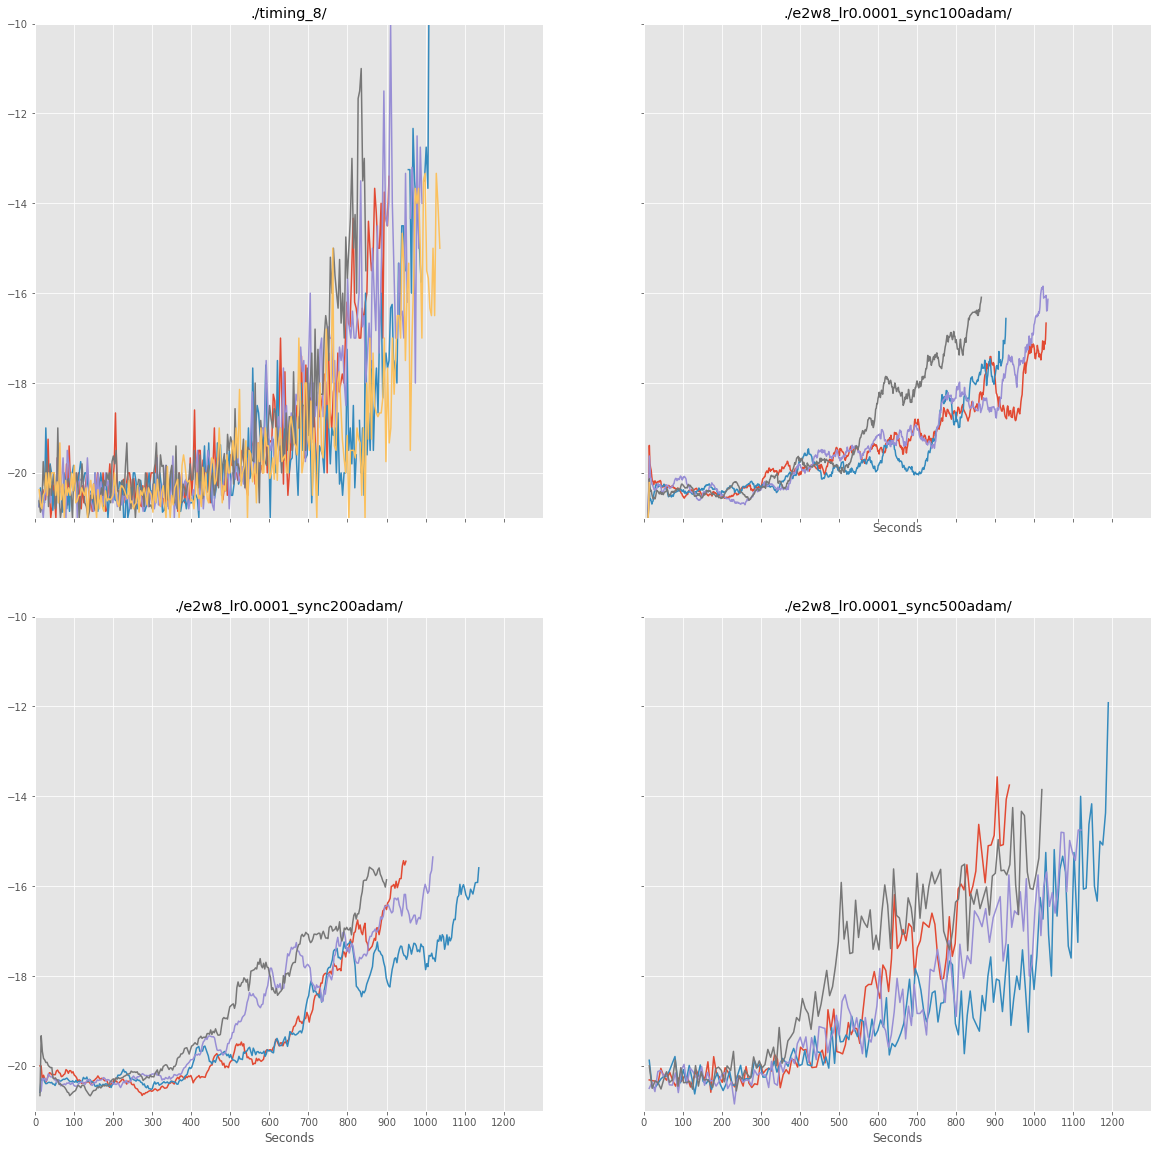

In [196]:
fig, axes = plt.subplots(2, 2, sharey=True, sharex=True)
fig.set_figwidth(20)
fig.set_figheight(20)
plot_timing("./e2w8_lr0.0001_sync100adam/", axes[0][1], window=20)
plot_timing("./e2w8_lr0.0001_sync200adam/", axes[1][0], window=10)
plot_timing("./e2w8_lr0.0001_sync500adam/", axes[1][1], window=1)
plot_singletiming("./timing_8/", axes[0][0])

./e4w8_lr0.0001_sync100adam/ Timing
0:16:46.499069
0:20:01.192170
0:19:19.985331


/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,center=False,window=20).mean()
  import sys


0:20:00.256039
./e4w8_lr0.0001_sync200adam/ Timing
0:20:00.738383
0:20:03.309258
0:20:01.434135
0:18:21.789208
./e4w8_lr0.0001_sync500adam/ Timing
0:20:02.256325
0:20:10.335499
0:20:00.735108


/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,center=False,window=10).mean()
  import sys
/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,center=False,window=1).mean()
  import sys


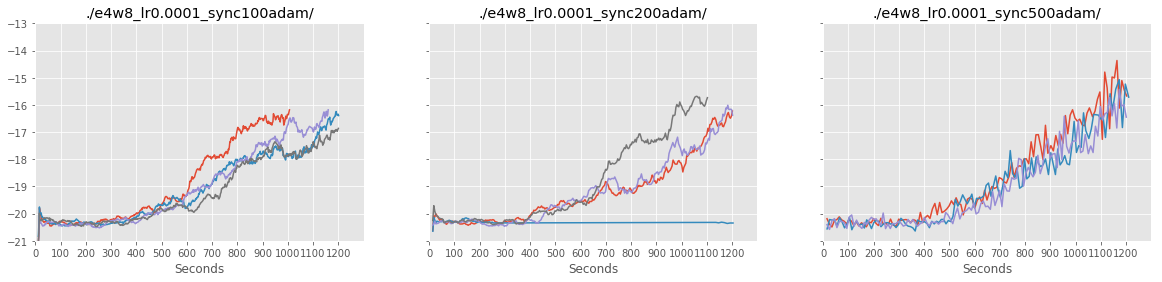

In [193]:
fig, axes = plt.subplots(1, 3, sharey=True, sharex=True)
fig.set_figwidth(20)
plot_timing("./e4w8_lr0.0001_sync100adam/", axes[0], window=20)
plot_timing("./e4w8_lr0.0001_sync200adam/", axes[1], window=10)
plot_timing("./e4w8_lr0.0001_sync500adam/", axes[2], window=1)

./e6w8_lr0.0001_sync100adam/ Timing
0:20:02.527853
0:20:00.023558
0:20:01.372627
./e6w8_lr0.0001_sync200adam/ Timing


/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,center=False,window=10).mean()
  import sys


0:20:02.858497
0:20:02.544869
0:20:04.003908
./e6w8_lr0.0001_sync500adam/ Timing
0:20:03.469997
0:20:01.546382
0:20:02.179385


/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,center=False,window=5).mean()
  import sys


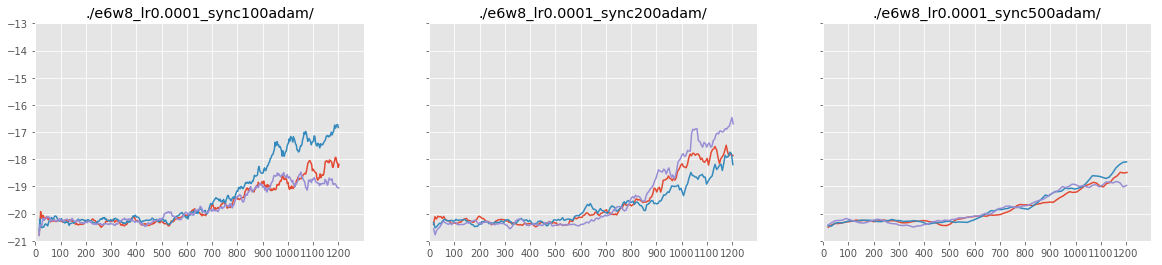

In [177]:
fig, axes = plt.subplots(1, 3, sharey=True)
fig.set_figwidth(20)
plot_timing("./e6w8_lr0.0001_sync100adam/", axes[0], window=10)
plot_timing("./e6w8_lr0.0001_sync200adam/", axes[1])
plot_timing("./e6w8_lr0.0001_sync500adam/", axes[2])

./e2w8_lr0.0001_sync100adam/ Timing
0:17:10.296031
0:15:27.341267
0:17:14.969965
0:14:24.395309
0:00:13.298416
./e4w8_lr0.0001_sync100adam/ 

/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,center=False,window=10).mean()
  import sys
/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,center=False,window=5).mean()
  import sys


Timing
0:16:46.499069
0:20:01.192170
0:19:19.985331
0:20:00.256039
./e6w8_lr0.0001_sync100adam/ Timing
0:20:02.527853
0:20:00.023558
0:20:01.372627


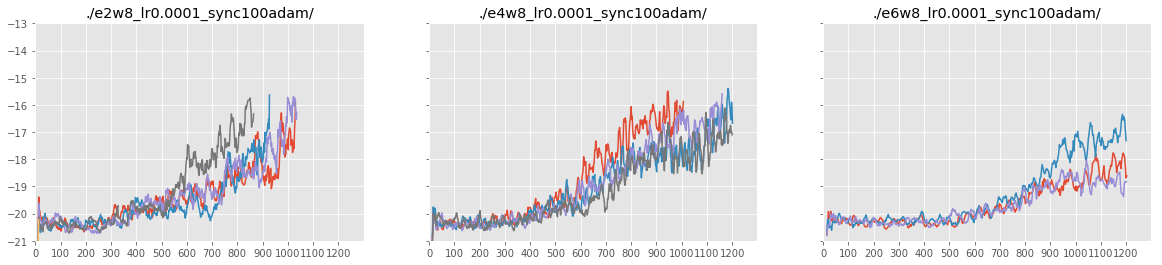

In [181]:
fig, axes = plt.subplots(1, 3, sharey=True)
fig.set_figwidth(20)
plot_timing("./e2w8_lr0.0001_sync100adam/", axes[0], window=10)
plot_timing("./e4w8_lr0.0001_sync100adam/", axes[1])
plot_timing("./e6w8_lr0.0001_sync100adam/", axes[2])

./e6w8_lr0.0001_sync100adam/ Timing
0:20:02.527853
0:20:00.023558
0:20:01.372627
./e6w8_lr0.0001_sync200adam/ Timing
0:20:02.858497
0:20:02.544869
0:20:04.003908
./e6w8_lr0.0001_sync500adam/ Timing
0:20:03.469997
0:20:01.546382
0:20:02.179385


/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,center=False,window=3).mean()
  import sys
/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,center=False,window=1).mean()
  import sys


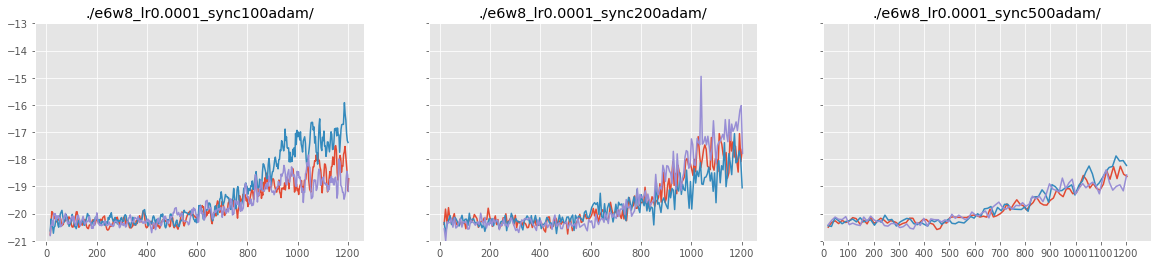

In [137]:
fig, axes = plt.subplots(1, 3, sharey=True)
fig.set_figwidth(20)
plot_timing("./e6w8_lr0.0001_sync100adam/", axes[0], window=3)
plot_timing("./e6w8_lr0.0001_sync200adam/", axes[1], window=1)
plot_timing("./e6w8_lr0.0001_sync500adam/", axes[2], window=1)

665
582
648

/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys



547
5
216
2


/home/ubuntu/anaconda3/envs/ray/lib/python3.5/site-packages/ipykernel_launcher.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


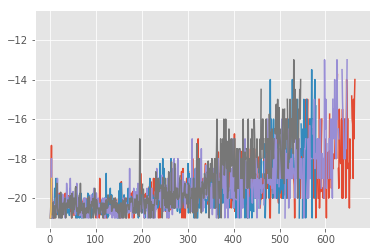

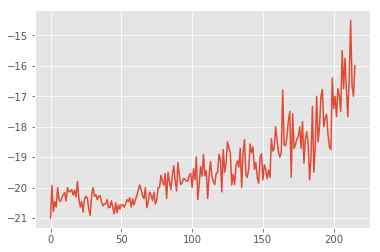

In [166]:

fdir = "./e2w8_lr0.0001_sync100adam/"
for fname in glob.glob(os.path.join(fdir, "*.json")):
    with open(fname) as f:
        js = json.load(f)
    print (len(js['stats']))
    result = np.nanmean(js['stats'], axis=1)[:, 0]
    plt.plot(result)
#     print(np.asarray(np.mean(js['stats'][-20:], axis=1)))
    
plt.figure()
cfdir = "./sync_100-wrkr_2/"
for fname in glob.glob(os.path.join(cfdir, "*.csv")):
    result = pd.read_csv(fname)
    x = result['results']
    x = x.convert_objects(convert_numeric=True)
    gb = x.apply(lambda x: json.loads(x)).groupby(x.index // 6)
    lst = gb.apply(lambda x: np.sum(x))
    done = lst.apply(lambda v: np.mean(v))
    print(len(done))
    if len(done) < 10:
        continue
    else:
        plt.plot(done)
#     x.groupby(x.index / 6).apply(np.concatenate).mean().plot()
#     result = load(fname)
#     x = result['results']
#     performance = x.apply(json.loads).apply(np.nanmean)
#     print(len(performance))
#     plot(performance, ax, fname.split(fdir)[1])


array([[         nan,          nan],
       [         nan,          nan],
       [-20.80555556,   0.24046817]])

In [65]:
np.sum([[], []])

0.0